In [6]:
#scrape done 2/13/23
import pandas as pd
import numpy as np
import json
import re
from IndeedClean import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [7]:
#avg data analyst salary is approx 60-75k per year (28.85-36.06/hr): https://www.payscale.com/research/US/Job=Data_Analyst/Salary
#avg data scientist salary is approx 70-137k per year (33.65-65.87/hr): https://www.payscale.com/research/US/Job=Data_Analyst/Salary
analyst = pd.read_json("data_analyst_results.json")
scientist = pd.read_json("data_scientist_results.json")

In [8]:
analyst.head()

,keyword,location,page,position,company,jobkey,jobTitle,salarymin,salarymax,salarytype,post_age,jobDescription
0,data analyst,Remote,1,0,Ortho Clinical Diagnostics,69541bdab7fa4073,Senior Data Analyst,NaN,NaN,None,30+ days ago,<div>\n <div>\n The Opportunity\n </div>\n <d...
1,data analyst,Remote,6,14,Hazel Health,92efe36db79f7d46,Data Analyst,NaN,NaN,None,27 days ago,"<div>\n <h2 class=""jobSectionHeader""><b>About ..."
2,data analyst,Remote,5,14,E-business International Inc,28e4900977238b7f,Marketing Data Analyst,70000.0,80000.0,yearly,Today,<p><b>Job Description:</b></p>\n<p><b>Role: Ma...
3,data analyst,Remote,5,13,Vetcove,9850b6bf7190979c,Data Analyst,NaN,NaN,None,30+ days ago,"<div>\n <p>Join our growing team at Vetcove, a..."
4,data analyst,Remote,5,12,Vetro Tech Inc,c8fca1f4524538f0,Data Analyst,83000.0,93000.0,yearly,Today,<p>We are looking for a passionate certified D...


In [9]:
analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   keyword         83 non-null     object 
 1   location        83 non-null     object 
 2   page            83 non-null     int64  
 3   position        83 non-null     int64  
 4   company         83 non-null     object 
 5   jobkey          83 non-null     object 
 6   jobTitle        83 non-null     object 
 7   salarymin       23 non-null     float64
 8   salarymax       23 non-null     float64
 9   salarytype      23 non-null     object 
 10  post_age        83 non-null     object 
 11  jobDescription  83 non-null     object 
dtypes: float64(2), int64(2), object(8)
memory usage: 7.9+ KB


In [10]:
#look through description for salaries
print(type(analyst.iloc[0].jobDescription))
print(re.findall(r"\$(\d+,*\.*\d*)", analyst.iloc[0].jobDescription))
print(re.findall(r"\$(\d+,*\.*\d*)", "there is $33 and $100.25 stuff"))
print(analyst.shape[0])

<class 'str'>
['80,000', '143,000']
['33', '100.25']
83


In [11]:
test = pd.DataFrame([[1,2],[2,4],[3,6],[4,8]],columns=["col1", "col2"])
test.iloc[0] = [10,10]
test["col1"] = pd.DataFrame([[11],[12],[13],[14]],columns=["col1"])
test[["col1", "col2"]] = pd.DataFrame([[1,1],[1,2],[1,3],[1,4]],columns=["col1", "col2"])
empty = pd.DataFrame(columns=["col1", "col2"])
z = []
z.append([1,2])
z.append([3,4])
z

[[1, 2], [3, 4]]

In [12]:
# Cleaning Functions
# #look through description for salaries
# def update_salary_from_description(df, salary_cols, desc_col, type_col=None):
#     """
#     Look through description col to find salary if salary is null
    
#     Parameters
#     ----------
#     df: DataFrame
#     salary_cols: list
#         list of string names of cols containing salary values
#     desc_col: str
#         col name containing job description
#     type_col: str
#         default None, str col name containing yearly/hourly info
        
#     Returns
#     -------
#     DataFrame
#         updated salaries from description, updated salary type if type_col specified
#     """
#     #Works inplace
#     exp = r"\$(\d+,*\.*\d*)[^A-Za-z]"
#     scols = df[salary_cols]
#     if type_col is not None:
#         types = df[type_col]
#         change = True
#     #loop through df, if salary null look at description
#     for i in range(df.shape[0]):
#         if not df.iloc[i].isna()[salary_cols[0]]:
#             continue
#         sal = re.findall(exp, df.iloc[i][desc_col])
#         if len(sal) == 0:
#             continue
#         elif len(sal) == 1:
#             sal.append(sal[0])
#         #clean sal strings
#         sal = list(map(lambda x: np.float64(x.replace(",","")), sal))
#         if len(sal) > 2:
#             sal = [np.min(sal), np.max(sal)]
#         #spotcheck sal for validity
#         #too low, probably wrong
#         if sal[0] < 15 or sal[1] < 15:
#             continue
#         #doesn't fit into hourly or yearly averages
#         elif (sal[0] > 100 and sal[0] < 50000) or (sal[1] > 100 and sal[1] < 50000):
#             continue
#         #likely one given hourly and one given yearly
#         elif sal[0] < 100 and (sal[1] >= 1000 and sal[1] <= 10000):
#             sal[1] = sal[0]
#         #same as above
#         elif sal[0] < 100 and sal[1] >= 50000:
#             sal[0] = sal[1]
#         #inconsistent salaries
#         elif sal[0] > 60 and sal[1] <= 10000:
#             continue
#         scols.iloc[i] = sal
#         if change:
#             if sal[0] >= 10000:
#                 types.iloc[i] = "yearly"
#             else:
#                 types.iloc[i] = "hourly"
#     if change:
#         df[type_col] = types
#     df[salary_cols] = scols
#     return df


# #clean salary cols
# def convert_yearly_to_hourly(df, cols_to_change, type_col):
#     """
#     Convert yearly salary to hourly assuming 52 weeks at 40 hours/wk and update the salarytype
    
#     Parameters
#     -----------
#     df: DataFrame
#     cols_to_change: ["col1", "col2"]
#         list of column names to modify in string format
#     type_col: str 
#         column name seperating 'yearly' and 'hourly' types
        
#     Returns
#     -------
#     DataFrame
#         specified cols now in hourly salary, all entries in type_col now 'hourly'
#     """
#     df.sort_values(by=type_col)
#     yearly, hourly = df[df[type_col] == "yearly"], df[df[type_col] == "hourly"]
#     null = df[df[type_col].isna()]
#     for col in cols_to_change:
#         yearly[col] = np.round(yearly[col]/(42*50), 2)
#     yearly[type_col] = yearly[type_col].str.replace("yearly", "hourly")
#     null[type_col] = null[type_col].fillna("hourly")
#     df = pd.concat([hourly, null, yearly]).sort_index()
#     return df


# def fill_null_salary(df, salary_cols, value=None):
#     """Fills salary columns null values
    
#     Parameters
#     ----------
#     df: DataFrame
#     salary_cols: list
#         contains labels of columns holding the salary data
#     value: list or numeric
#         default None, calculates and uses the average per column to fill na, otherwise uses value
        
#     Returns
#     --------
#     DataFrame
#         null entries in salary replaced
#     """
#     if value is not None and type(value) is list:
#         assert len(value) == len(salary_cols)
#         for i, col in enumerate(salary_cols):
#             df[col].fillna(value[i], inplace=True)
#     elif value is not None and type(value) is not list:
#         df[salary_cols].fillna(value)
#     else: 
#         for col in salary_cols:
#             value = np.round(df[col].mean(), 2)
#             df[col] = df[col].fillna(value)
#     return df


# #clean post age to integers
# def clean_post_age(df, age_col):
#     """Turn post age into integers
#     """
#     df[age_col] = df[age_col].str.replace("Today", "0").str.replace("Just posted", "0").str.strip("+ days ago").astype(int)
#     return df


# #use above functions to clean data
# def clean_indeed_data(df, salary_cols, type_col, age_col, desc_col, drop_meta=False, n_meta=1,
#                      drop_desc=False):
#     """
#     Updates salary, salary types, age of post, and fills na. Can drop meta and description cols
    
#     Parameters
#     ----------
#     df: DataFrame
#         dataframe containing indeed data to be cleaned
#     salary_cols: list
#         list of column names (as strings) storing salary info in df
#     type_col: str
#         label of the column containing yearly or hourly salary description
#     desc_col: str
#         label of the column containing the job description
#     drop_meta: bool
#         default False, if True drops meta columns (keyword, location, etc...). If True, the meta columns must be the first n columns
#     n_meta: int
#         default 1, number of columns to drop if True passed to drop_meta
#     drop_desc: bool
#         default False, if True drops the job description column. Not recommended if further analysis is desired from the job description.
        
#     Returns
#     -------
#     DataFrame
#         details of cleaned df can be found in individual functions:
        
#     See Also
#     --------
#     update_salary_from_description: function updates salary cols
#     convert_yearly_to_hourly: function consolidates salary to hourly
#     fill_null_salary: function fills empty salaries with average of non null
#     clean_post_age: function converts post age to int
#     """
#     if drop_meta:
#         to_drop = list(df.columns[:n_meta])
#         df.drop(labels=to_drop, axis=1, inplace=True)
#     if drop_desc:
#         df.drop(labels=desc_col, axis=1, inplace=True)
#     df = update_salary_from_description(df, salary_cols=salary_cols,
#                                         desc_col=desc_col, type_col=type_col)
#     df = convert_yearly_to_hourly(df, cols_to_change=salary_cols, type_col=type_col)
#     df = fill_null_salary(df, salary_cols)
#     df = clean_post_age(df, age_col)
#     return df

# def combine_results(df1, df2):
#     assert np.all(df1.columns == df2.columns)
#     df = pd.concat([df1, df2])
#     return df

In [13]:
analyst = clean_indeed_data(analyst, ["salarymin", "salarymax"], "salarytype", "post_age", "jobDescription", drop_meta=True, n_meta=4, drop_desc=False)

In [14]:
analyst.salarymin.value_counts()

40.68    45
55.00     3
33.33     2
30.95     2
71.43     2
40.48     2
38.10     1
36.67     1
21.43     1
47.62     1
39.10     1
32.00     1
28.57     1
60.00     1
32.86     1
0.00      1
53.62     1
31.25     1
65.00     1
56.82     1
42.63     1
35.71     1
61.90     1
26.81     1
27.43     1
30.84     1
21.00     1
31.48     1
51.43     1
20.00     1
62.38     1
39.52     1
34.14     1
Name: salarymin, dtype: int64

In [15]:
scientist = clean_indeed_data(scientist, ["salarymin", "salarymax"], "salarytype", "post_age", "jobDescription", drop_meta=True, n_meta=5, drop_desc=False)

In [72]:
stats = scientist.describe()
for col in list(stats.columns):
    stats[col] = stats[col].map("{:.2f}".format)
stats

,salarymin,salarymax,post_age
count,79.00,79.00,79.00
mean,51.81,78.20,16.77
std,13.80,25.22,11.97
min,0.00,-0.00,0.00
25%,48.46,66.67,6.00
50%,51.81,78.20,14.00
75%,51.81,78.20,30.00
max,93.81,238.10,30.00


In [17]:
print(scientist.columns)
print(analyst.columns)

Index(['company', 'jobkey', 'jobTitle', 'salarymin', 'salarymax', 'salarytype',
       'post_age', 'jobDescription'],
      dtype='object')
Index(['company', 'jobkey', 'jobTitle', 'salarymin', 'salarymax', 'salarytype',
       'post_age', 'jobDescription'],
      dtype='object')


In [18]:
#combine_results(analyst, scientist).to_pickle("./jobs.pkl")

In [19]:
jobs = pd.read_pickle("jobs.pkl")

In [20]:
titlestr = jobs.jobTitle.str.lower()

In [21]:
s1 = titlestr.str.contains("scientist|science", regex=True).astype(int)
s2 = titlestr.str.contains("analyst|scientist|science", regex=True).astype(int)
jobs["group"] = s1+s2

In [22]:
group_dict = {0:"other", 1:"analyst", 2:"scientist"}
#jobs.group

In [23]:
languages = ["python", "sql", "java", "c++", "django", "mongodb", "tableau", "powerbi", "rust",
            "c#", "css", "perl"]
descstr = jobs.jobDescription.str.lower()

In [24]:
for lang in languages:
    jobs[f"{lang}_req"] = descstr.str.contains(lang, regex=False)

In [25]:
language_reqs = jobs.loc[:,"python_req":"perl_req"]

In [26]:
language_reqs["R_req"] = jobs.jobDescription.str.contains("\sR[\s,]", regex=True)

In [27]:
language_reqs = language_reqs.astype(int)

In [28]:
pctlanguage = language_reqs.sum(axis=0)/162

In [29]:
cols = list(pctlanguage.sort_values(ascending=False).index)
language_reqs = language_reqs[cols]

In [55]:
color_list = jobs.group.replace([0,1,2], ["#BDCEC8", "#FF7070", "#376D65"])

In [58]:
color_list.value_counts()

#FF7070    81
#376D65    74
#BDCEC8     7
Name: group, dtype: int64

In [30]:
%matplotlib inline

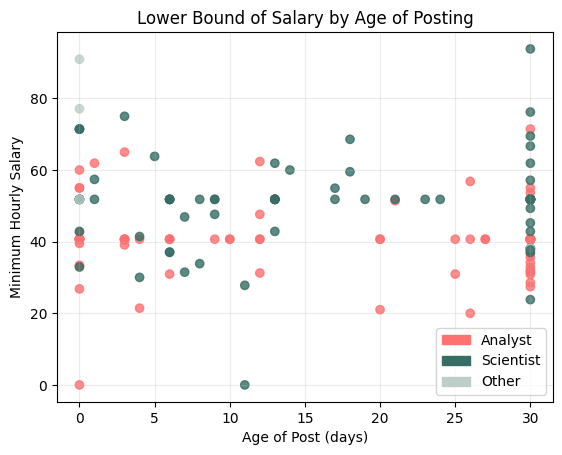

In [71]:
plt.scatter(x="post_age", y="salarymin", c=color_list, data=jobs, alpha= 0.8)
plt.title("Lower Bound of Salary by Age of Posting")
plt.xlabel("Age of Post (days)")
plt.ylabel("Minimum Hourly Salary")
plt.grid(visible=True, alpha=0.25)
otherPatch = mpatches.Patch(color="#BDCEC8", label="Other")
analystPatch = mpatches.Patch(color="#FF7070", label="Analyst")
sciencePatch = mpatches.Patch(color="#376D65", label="Scientist")
plt.legend(handles=[analystPatch, sciencePatch, otherPatch])
plt.show()
#plt.savefig("salarymin_by_age.png", bbox_inches="tight")

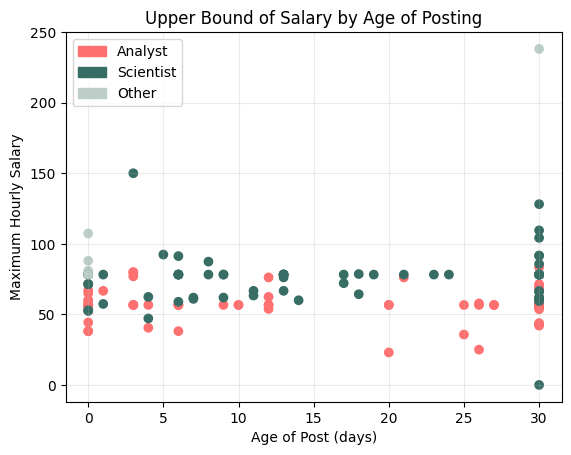

In [70]:
plt.scatter(x="post_age", y="salarymax", c=color_list, data=jobs)
plt.title("Upper Bound of Salary by Age of Posting")
plt.xlabel("Age of Post (days)")
plt.ylabel("Maximum Hourly Salary")
plt.grid(visible=True, alpha=0.25)
plt.legend(handles=[analystPatch, sciencePatch, otherPatch])
plt.show()
#plt.savefig("./salarymax_by_age.png", bbox_inches="tight")

In [33]:
newjobs = jobs.query("post_age < 30")

In [52]:
print("Pearson Correlation Coefficient for salary vs post_age:")
print(jobs[["salarymin","post_age"]].corr())
print(jobs[["salarymax","post_age"]].corr())

Pearson Correlation Coefficient for salary vs post_age:
           salarymin  post_age
salarymin   1.000000 -0.050655
post_age   -0.050655  1.000000
           salarymax  post_age
salarymax   1.000000  0.039702
post_age    0.039702  1.000000


In [53]:
print("Pearson Correlation Coefficient for salary vs post_age in jobs less than 1 month old:")
print(newjobs[["salarymin","post_age"]].corr())
print(newjobs[["salarymax","post_age"]].corr())

Pearson Correlation Coefficient for salary vs post_age in jobs less than 1 month old:
           salarymin  post_age
salarymin   1.000000 -0.097097
post_age   -0.097097  1.000000
           salarymax  post_age
salarymax   1.000000 -0.099576
post_age   -0.099576  1.000000


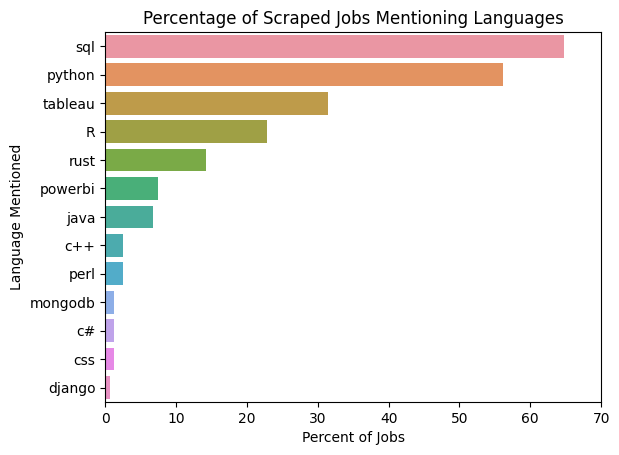

In [36]:
sns.barplot(data=language_reqs, errorbar=None, orient="h")
plt.xlabel("Percent of Jobs")
plt.ylabel("Language Mentioned")
plt.yticks(ticks=plt.yticks()[0], labels=list(map(
    lambda x:x.rstrip("_req"),list(language_reqs.columns)
                                                    )))
plt.xticks(ticks=plt.xticks()[0], labels=[0,10,20,30,40,50,60,70])
plt.title("Percentage of Scraped Jobs Mentioning Languages")
plt.show()
#plt.savefig("./language_pct.png", bbox_inches="tight")

# An Analysis of Indeed Jobs on 2/13/23
***
## Background
In this project I look to gather information and make insights from jobs listed on Indeed. To do this, I scraped the website using a scrapy Spider. The initial scrapes were performed on 2/13/23 using the keywords "Data Analyst" and "Data Scientist" and the work here only uses this scrape. The motivation behind this is a long series of applications met with no response. Knowing the information about jobs I have already applied for and gathering information straight from Indeed will guide my decision on where to apply. For reference, according to [payscale.com](https://www.payscale.com/), the average salaries for a Data Analyst and Data Scientist are \$28.85-\$36.06/hr and \$33.65-\$65.87/hr, respectively. All files/saved functions can be found in this project's [workspace](https://app.datacamp.com/workspace/w/150ff515-1ba5-4dec-936d-829e0218f15b/edit).

## Scraping
The spider used for scraping is modified from the publicly available template found on github [here](https://github.com/python-scrapy-playbook/indeed-python-scrapy-scraper/blob/master/README.md) and I have moved the modified files from my VS Code to the folder "Scraper" in this workbook. Essentially, the spider starts by searching Indeed using provided keywords and locations then selects each job card and scrapes the corresponding job for information. This requires two parse functions: the first to deal with the search results page, find the job cards, and move to the next search page; the second to get the information from the job page itself.

> ### The Process
On a first run, the template spider returned the meta-data from the search results pages but was returning null values for every entry from the job page except the raw job description. As the template didn't provide all of the information I wanted to gather, I had to scour the pages' source codes to find where the problem was and where the additional data was stored. After some searching, it turned out the template was one level outside of the json object that stored the Job Title and Company Name. Luckily there was additional data for Minimum Salary, Maximum Salary, and Salary Type (yearly/hourly) to be found here, so these additions were easy to add. From there, I also wanted to grab the age of the job posting, which was found in the first "\_initialData" object nested in the "jobMetadataFooterModel" object with the key "age". This gave me all of the data that I wanted to scrape, so after a short test scrape (so as not to waste too many free scrape-ops credits), a full scrape was done for both "Data Analyst" and "Data Scientist" and saved as json files (data_analyst_results.json and data_scientist_results.json).

## Cleansing the Data
Now that I had the data stored nicely, I moved from VS Code to a Jupyter Notebook to work with the data in real time. I loaded both files into a pandas DataFrame and started working with the analyst DataFrame. On first inspection, many entries had missing salary information (not too uncommon when dealing with Indeed's postings), so this is the first thing I wanted to address.

> ### A Clean Salary
To fix this problem, there were a few options: fill the min and max salaries with the information obtained from payscale, fill them with the averages for the columns currently present, or try to fill them with information from the job description. Of course, more accurate information is always good, so the third option was chosen. As the job description had been stored as html text, this was most easily done by using the re package to search for strings matching a regular expression. However, many jobs will add benefits or examples of other companies as monetary amounts which can lead to confusion, so some sanity checks were necessary to be implemented. To do this, I looked for a value matching \$xxxxx, and would pull out the min and max values from the resulting list. If the max was unreasonably low (say \$15 or lower) it would not make sense as any kind of salary. Similar edge cases were handled and the data was filled in.

Since this could not handle every job given, I opted to finish this by filling in the remaining null values with the average of the min and max columns, respectively. Then, to be able to actually work with the data, I converted all of the salaries to hourly rates. Hourly was chosen instead of yearly as this is what I prefer to look at when I go through job listings, but the reverse could easily be done. Following these adjustments, the min and max salaries and salary types all matched the desired form.

> ### A New Age
There were no missing values for the post_age column, but Indeed stores the age using days as a unit of measurement, so these values weren't immediately ready to be worked with. The values "Just Posted" and "Today" were replaced with 0. The other inputs all had the form "x day(s) ago", where x goes from 1-30, but at 30 the job age falls into the "30+ days ago" category. There isn't much to do to determine the actual age of these postings, so leaving them at 30 with the understanding that in this column 30 could represent a value much larger was the best option. The strings were then stripped and converted to integers which made them now ready to work with.

> ### Dropping the Dead Weight
At this point, all of the above processes had been made into functions and I wanted to bring them all together. I made one final function that would take a DataFrame through all of the cleaning done so far and give the option to drop the metadata columns (such as page number or keyword used) as well as the option to drop the description column. I wasn't sure if this was something I wanted to do yet, so I only opted to drop the meta columns and kept the job description. The functions are all stored in IndeedClean.py, found in this workspace. The two dataframes were cleaned and combined into a single DataFrame, jobs.

It is important to note that since I have dropped the keyword, I now am only able to tell the analyst jobs from the scientist jobs using the job title column. Additionally, keyword searches can also bring up jobs outside the desired title (for example, there is one software engineering position in the dataset). Thus I created a new column named group, which was assigned a '2' if the job title contained either "science" or "scientist", '1' if the title contained "analyst", and '0' if it contained none of these.

## Analyzing the Data
Something I had been curious about since starting this process was how the age of a job posting affected the salaries that were currently available on Indeed. Following this, I made two graphs: one for the min salary and one for the max salary, both against the age of their job posting.
![](salarymin_by_age.png)
![](salarymax_by_age.png)

It is evident in both graphs that a large portion of the jobs fall into the 30+ days category. I find this likely to be either large companies that have an ongoing need to hire but don't want to make new listings, companies that have filled the position and not removed it from Indeed, or companies that legitimately have not found a viable candidate to fill the position in more than a month. Without contacting Indeed or the companies (and hoping for a response), there is no way to tell.

However, another finding in both graphs is that the higher and lower salaries seem to be more focused towards the youngest and oldest postings with the postings in the middle being more clustered towards a median salary. The high outlier in the max salary graph in the 30 days group comes from Netflix. This is a Metadata Specialist position (falling into the "other" category), where in the description they note that the salary ranges from \$80,000 to \$500,000. For both min and max salary, the correlation is not linear (if there is correlation present) based on observation of the scatter plot and confirmed by the Pearson coefficient for both lying in the range $(-0.05,0.05)$. Given the relatively low sample size and high aggregation of points at the end, it is difficult to determine if there is any true correlation here. This could be improved by tracking job listings over time and updating their age.

> ### Adding Some Requirements
Anyone who has looked for a job is familiar with the sometimes overwhelming requirements they list. Indeed lists some skills in little boxes on the job cards, but there was no solid way to scrape this data using the spider. If we limit what we want to look at though, we can use the job description text to get more information. To this end, I made a list of common programming languages or data visualization tools: \["python", "sql", "java", "c++", "django", "mongodb", "tableau", "powerbi", "rust", "c#", "css", "perl"\] and set about searching the job descriptions for them. The language "R" had to be done separately, since the rest could be found without using regex, but "R" needed a regex search to avoid matching anything else with a capital R. Instead of listing all matching results for each row into a single column I created a column for each of the languages, and set it to True if there was a match. Changing the boolean values to integers, I was then able to calculate the percent of jobs in which each of the languages showed up.
![](language_pct.png)

## Conclusions
From the last graph we see that some flavor of SQL is extremely common in Data Analyst/Science jobs as the main querying language, many jobs like to see Python skills, and Tableau is a common request for data visualization. From there, R is also semi-common for statistical testing, and the remaining languages fall off. Note that although Rust is growing in popularity, neither that nor C are extremely common (in this sample) for data based jobs on Indeed. I would make the argument that Python and SQL are the most important to know for these fields.

As for salaries, the averages found using a site like Payscale or GlassDoor are more accurate as they have much more data to support them. That given, the listings here still fall within the normal range most of the time. Contract positions are bound to have more variability as the pay may be commission or project based. Looking at jobs with a higher base salary, it seems that the job listings within the last week and the listings that are at least a month old are the best bets to find such a salary. Hearing back on the jobs is an entirely different story, especially for the jobs listed over a month. Additionally, some judgement can be used on job applications, as applying for a Senior Data Science managerial position with no on-the-job experience is perhaps asking to be ignored.

> ### Improving
The processes in the cleaning portion of the code can definitely be optimized, and if I continue scraping Indeed with the same motivation I will work on doing so. For the relatively small DataFrame presented, the functions all performed well and quickly. In the future I would also need to find a way to track jobs that are already listed here without duplicating everything (the job descriptions can get quite large), as well as set the job to run on a consistent basis, which in itself brings many requirements. I could set up a server to store the data and run the scrape at fixed intervals, which over time would make all of the data more accurate.

> ### Closing Remarks
From this, I have learned that perhaps adding Tableau to my arsenal would make me more appealing to employers. In the meantime, I will continue expanding my portfolio with more fun personalized projects.